# Machine Learning Beginner Project: Linear Regression

In [65]:
# imprting all the packages
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [31]:
# loading dataset
df = pd.read_csv('../data/hou_all.csv')
df.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,1.1
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [66]:
#adding column name 
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV','BIAS_COL']
df.columns = col_names

- excluding the target variable 

In [67]:
# defining feature and target
# feature
X = df.drop(columns=['MEDV', 'RAD'], axis=1)
# target
y = df['MEDV']

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,BIAS_COL
173,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,296,16.6,393.23,9.64,1
274,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,254,17.6,396.90,2.98,1
490,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,711,20.1,390.11,18.07,1
72,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,305,19.2,377.17,7.54,1
305,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,222,18.4,396.90,6.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,666,20.2,16.45,20.62,1
117,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,432,17.8,338.63,15.37,1
42,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,233,17.9,394.46,7.44,1
321,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,287,19.6,396.90,7.70,1


In [71]:
y_test

173    22.6
274    32.0
490    13.6
72     23.4
305    33.4
       ... 
417     8.8
117    20.4
42     24.7
321    20.4
346    23.1
Name: MEDV, Length: 127, dtype: float64

In [72]:
# predicting training set
pred = model.predict(X_test)

# performing cross validation
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [79]:
print("Linear Regression -\n  MAE:", mae, "MSE:" ,mse, "R2:" ,r2)

Linear Regression -
  MAE: 3.182394167629652 MSE: 19.573881758547856 R2: 0.6667024777797158


- Mean Squared Error (MSE): It measures the average squared difference between the actual and predicted values. Lower MSE indicates better model performance.
The ideal value of both MSE  is 0. The model gives the best result when the value are lower. Here,  MSE has significantly larger value i.e 19.573881758547856. MSE penalizes larger errors more than smaller ones due to squaring the differences. 

- Mean Absolute Error (MAE): It measures the average absolute difference between the actual and predicted values.
Lower MAE indicates better model performance.
The ideal value of both MAE is 0. The model gives the best result when the value are lower. Here, while the value of MAE is l3.182394167629652 .This means, on average, the model's predictions are off by about 3.18 units from the actual values. 

- R-squared (R2): It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
R2 ranges from 0 to 1, with higher values indicating better model performance.

The ideal value of both R-squares is 1. The model gives the best result when the value as high as possible, closer to 1. Here, the value of R2 is 6667024777797158. This means that about 67% of the variance in the target variable is explained by the model.

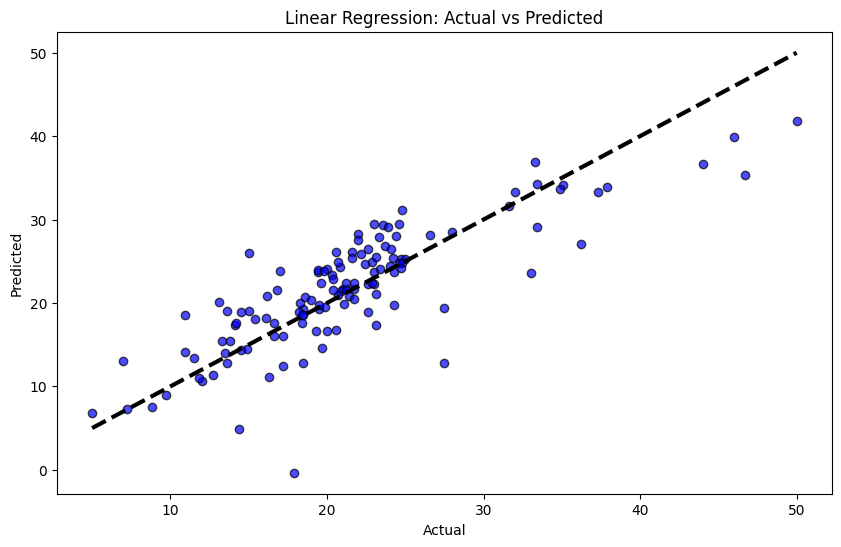

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


- Points that are close to the diagonal line indicate good predictions by the model. The closer the points are to the line, the better the model's performance.
- Points that are far from the diagonal line indicate larger errors in the predictions.The farther the points are from the line, the worse the model's performance for those observations.

#### Hyperparameter 
For this, using Grid-search. It is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

In [75]:
# Defining parameter grid for Ridge regression
param_grid = {'alpha': [0.1, 1, 10, 100, 200]}
# Initialize the Ridge regression model
ridge = Ridge()

In [76]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 200]})

In [77]:
# Get the best model from the grid search
best_ridge_model = grid_search.best_estimator_
# Make predictions on the test set with the best model
pred_best = best_ridge_model.predict(X_test)

In [78]:

# Evaluate the best model's performance
mae_best = mean_absolute_error(y_test, pred_best)
mse_best = mean_squared_error(y_test, pred_best)
r2_best = r2_score(y_test, pred_best)

print(f"Ridge Regression - Best Alpha: {grid_search.best_params_['alpha']}, MAE: {mae_best}, MSE: {mse_best}, R2: {r2_best}")

Ridge Regression - Best Alpha: 0.1, MAE: 3.177282240159036, MSE: 19.565392366358747, R2: 0.6668470323150241


- These results are very close to those of the plain linear regression model, suggesting that the regularization effect of Ridge regression was minimal in this case.